We Import necessary libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
import plotly.express as px

We then import the dataset

In [77]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

Split the dataset into the Training set and Test set

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Training the Logistic Regression model on the Training set

In [79]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predicting the Test set results

In [80]:
y_pred = classifier.predict(X_test)

Making the Confusion Matrix

In [81]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)


Visualize the Confusion Matrix

In [82]:
cm_df = pd.DataFrame(cm, columns=classifier.classes_, index=classifier.classes_)
cm_fig = px.imshow(cm_df, labels=dict(x="Predicted", y="True"), x=classifier.classes_, y=classifier.classes_,
                   color_continuous_scale='Blues', title='Confusion Matrix')
cm_fig.show()

Calculate ROC Curve

In [83]:
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)
y_score = classifier.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test_binary, y_score)
roc_auc = auc(fpr, tpr)

Visualize the ROC Curve

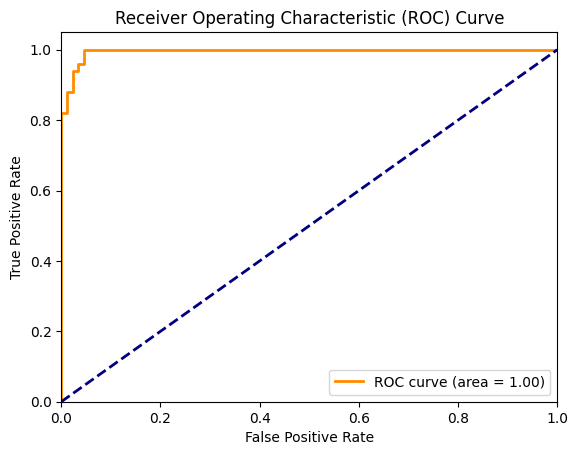

In [84]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Classification Report

In [85]:
y_test_original = y_test.ravel()
y_pred_original = y_pred.ravel()

Compute and display the classification report

In [86]:
report = classification_report(y_test_original, y_pred_original, target_names=[str(label) for label in lb.classes_])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



Confusion Matrix Labels

In [87]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [88]:
print(f'True Positives (TP): {TP}')
print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')

True Positives (TP): 47
True Negatives (TN): 84
False Positives (FP): 3
False Negatives (FN): 3


In [89]:
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_score)
average_precision = average_precision_score(y_test_binary, y_score)

Precision -Recall Visualization

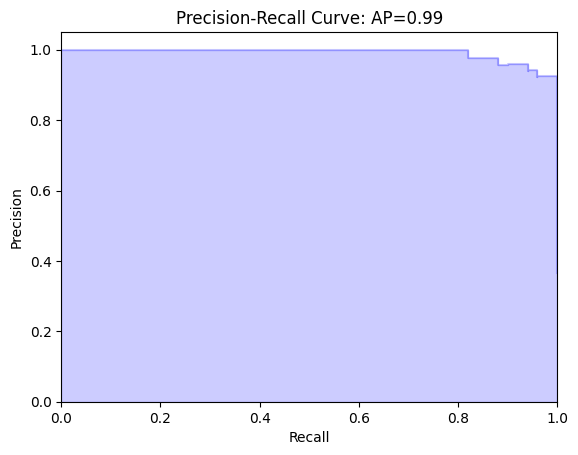

In [90]:
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()

Confusion Matrix Labels

In [91]:
labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
values = [TP, TN, FP, FN]


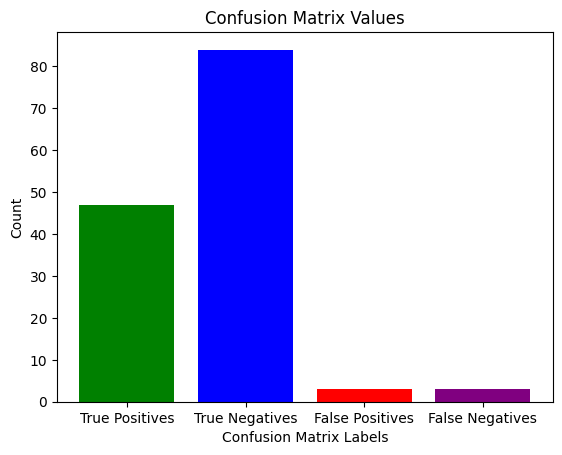

In [92]:
plt.bar(labels, values, color=['green', 'blue', 'red', 'purple'])
plt.xlabel('Confusion Matrix Labels')
plt.ylabel('Count')
plt.title('Confusion Matrix Values')
plt.show()

 Computing the accuracy with k-Fold Cross Validation

In [93]:

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))


Accuracy: 96.70 %
Standard Deviation: 1.97 %


Creating a bar plot for cross-validated model performance

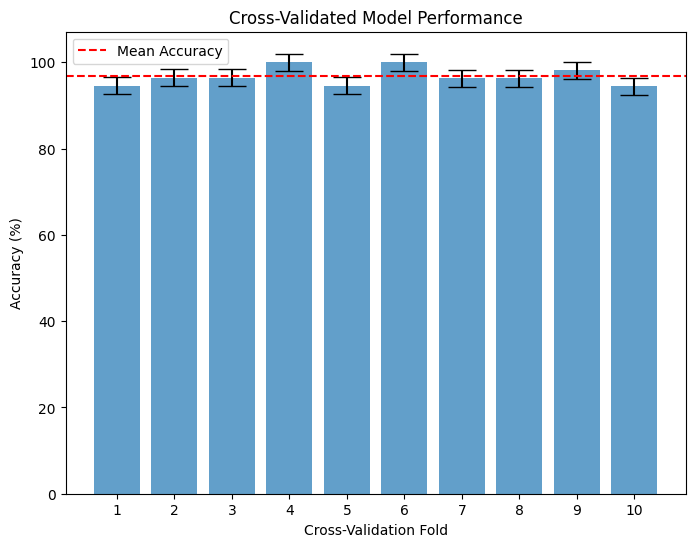

In [94]:
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(accuracies)), accuracies * 100, yerr=accuracies_std, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.axhline(y=accuracies_mean, color='r', linestyle='--', label='Mean Accuracy')
plt.xticks(np.arange(len(accuracies)), np.arange(1, len(accuracies) + 1))
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validated Model Performance')
plt.legend()
plt.show()